In [224]:
from importlib import reload
import board
import snake
reload(board)
reload(snake)
from board import GeneralBoard
from snake import Snake

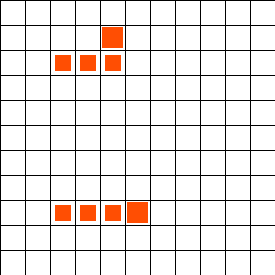

In [225]:
sample_game_state = {"game": {"id": "d76a05f5-e961-4523-807f-2d5e5825cd95", "ruleset": {"name": "standard", "version": "cli", "settings": {"foodSpawnChance": 15, "minimumFood": 1, "hazardDamagePerTurn": 14, "hazardMap": "", "hazardMapAuthor": "", "royale": {"shrinkEveryNTurns": 25}, "squad": {"allowBodyCollisions": False, "sharedElimination": False, "sharedHealth": False, "sharedLength": False}}}, "map": "standard", "timeout": 500, "source": ""}, "turn": 7, "board": {"height": 11, "width": 11, "snakes": [{"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "8", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}, {"id": "8e15dfcc-fe37-4484-a946-62ff1430f6ac", "name": "Team 1 Snake 2", "latency": "8", "health": 95, "body": [{"x": 5, "y": 8}, {"x": 4, "y": 8}, {"x": 3, "y": 8}, {"x": 2, "y": 8}], "head": {"x": 5, "y": 8}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}], "food": [{"x": 5, "y": 5}, {"x": 10, "y": 10}], "hazards": []}, "you": {"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "0", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 5, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}}
board = GeneralBoard(11, 11)
snake1 = Snake(sample_game_state["board"]["snakes"][0]["id"])
snake2 = Snake(sample_game_state["board"]["snakes"][1]["id"])
snake1.place_on_board(board)
snake2.place_on_board(board)
snake1.update_state(sample_game_state["board"]["snakes"][0])
snake2.update_state(sample_game_state["board"]["snakes"][1])

board

In [226]:
snake1.head

Cell(4, 1)

Cell(5, 1)
[Cell(5, 1), Cell(4, 1), Cell(4, 2), Cell(3, 2)]


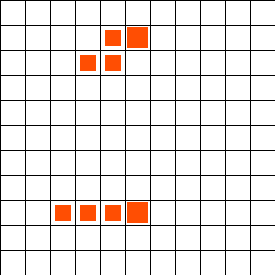

In [233]:
new_s = snake1.simulate_move("right")
print(new_s.head)
print(new_s.body)
print(new_s.head.snake)
new_s.board

In [228]:
future = snake1.alternative_futures("up")

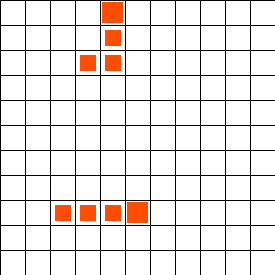

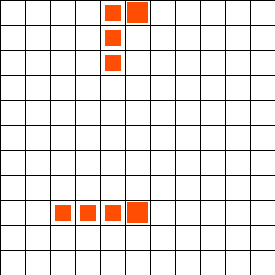

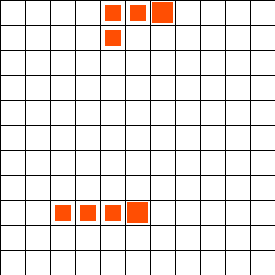

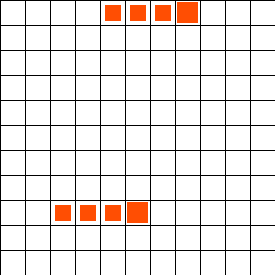

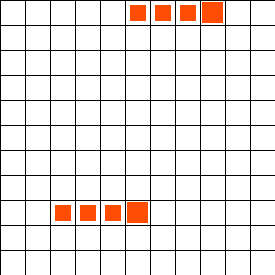

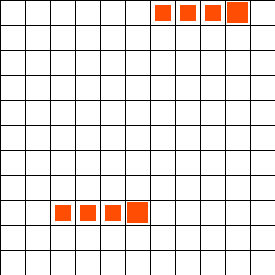

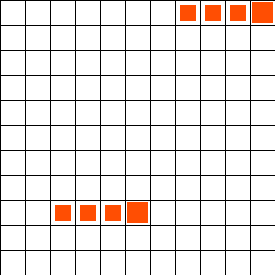

[None, None, None, None, None, None, None]

In [229]:
[f._repr_png_() for f in future]

In [230]:
def benchmark():
    import time
    start = time.time()
    subboards = board.get_possible_subboards()
    for subboard in subboards:
        next_subboards = subboard.get_possible_subboards()
        for next_subboard in next_subboards:
            next_subboard.get_possible_subboards()
    end = time.time()
    duration_ms = (end - start) * 1000
    print(duration_ms)

In [231]:
%prun benchmark()

8455.995559692383
 

         5379658 function calls in 7.949 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   560835    2.406    0.000    2.905    0.000 board.py:9(__init__)
   373890    2.088    0.000    4.447    0.000 board.py:62(copy)
   379578    0.906    0.000    1.166    0.000 board.py:48(clear_snake_info)
     1545    0.507    0.000    1.405    0.001 board.py:91(create_cells)
     1545    0.502    0.000    3.197    0.002 board.py:151(<listcomp>)
  1340855    0.459    0.000    0.459    0.000 board.py:25(set_snake)
   934725    0.248    0.000    0.248    0.000 board.py:19(set_food)
   934725    0.246    0.000    0.246    0.000 board.py:22(set_hazard)
     8466    0.159    0.000    0.159    0.000 board.py:113(clear_snake)
   379578    0.132    0.000    0.132    0.000 board.py:32(set_closest_snakes)
     8466    0.047    0.000    0.215    0.000 board.py:104(place_snake)
   395520    0.037    0.000    0.037    0.000 {method 'append' of 'li